In [4]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [8]:
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [9]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


In [10]:
print(train.subject.value_counts())
print('-'*30)
print(test.subject.value_counts())

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64
------------------------------
subject
24    381
18    364
20    354
13    327
12    320
4     317
2     302
10    294
9     288
Name: count, dtype: int64


In [11]:
print(sum(train.duplicated()))
print(sum(test.duplicated()))

0
0


In [12]:
print(train.isna().values.sum())
print(test.isna().values.sum())

0
0


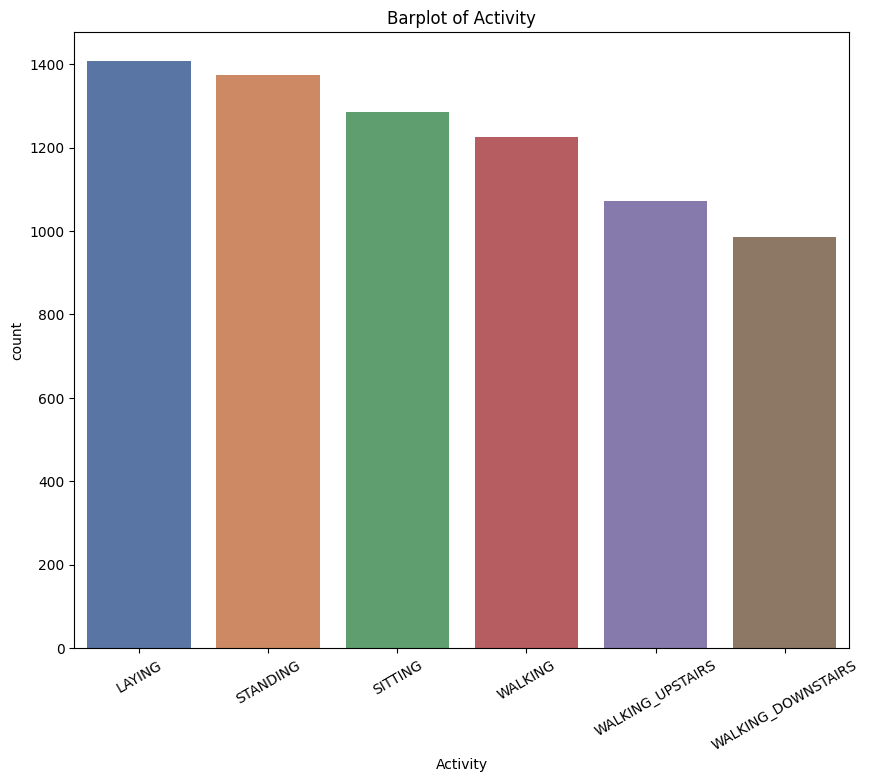

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Barplot of Activity')
palette = sns.color_palette("deep", n_colors=train.Activity.nunique())
sns.countplot(data=train, x='Activity', order=train.Activity.value_counts().index, palette=palette)
plt.xticks(rotation=30)
plt.show()

## Exploratory Data Analysis

In [14]:
counted_cols = Counter([col.split('-')[0].split('(')[0] for col in train.columns])
df = pd.DataFrame.from_dict(counted_cols, orient='index').rename(columns={0: "count"}).sort_values('count', ascending=False)
print(df)

                      count
fBodyAccJerk             79
fBodyGyro                79
fBodyAcc                 79
tBodyAcc                 40
tBodyGyro                40
tBodyAccJerk             40
tGravityAcc              40
tBodyGyroJerk            40
tBodyAccJerkMag          13
tGravityAccMag           13
tBodyGyroJerkMag         13
tBodyAccMag              13
tBodyGyroMag             13
fBodyAccMag              13
fBodyBodyAccJerkMag      13
fBodyBodyGyroMag         13
fBodyBodyGyroJerkMag     13
angle                     7
subject                   1
Activity                  1


Text(0.1, 9, 'Dynamic Activities')

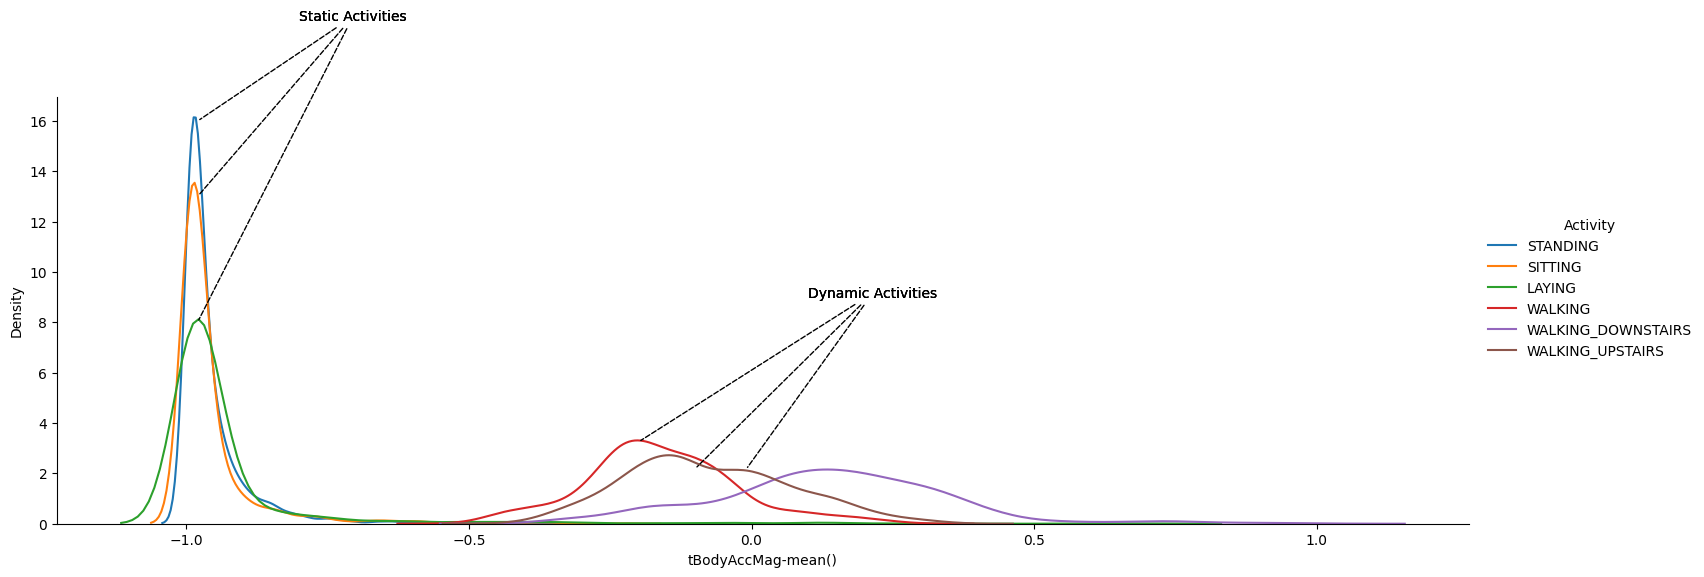

In [15]:
facetgrid = sns.FacetGrid(train,hue = 'Activity', height = 5 , aspect =3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist = False).add_legend()
plt.annotate('Static Activities',xy = (-.98,8),xytext = (-.8,20),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy = (-.98,13),xytext = (-.8,20),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy = (-.98,16),xytext = (-.8,20),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate('Dynamic Activities',xy = (-0.2,3.25),xytext = (0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy = (-0.1,2.18),xytext = (0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy = (-0.01,2.15),xytext = (0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})

<function matplotlib.pyplot.show(close=None, block=None)>

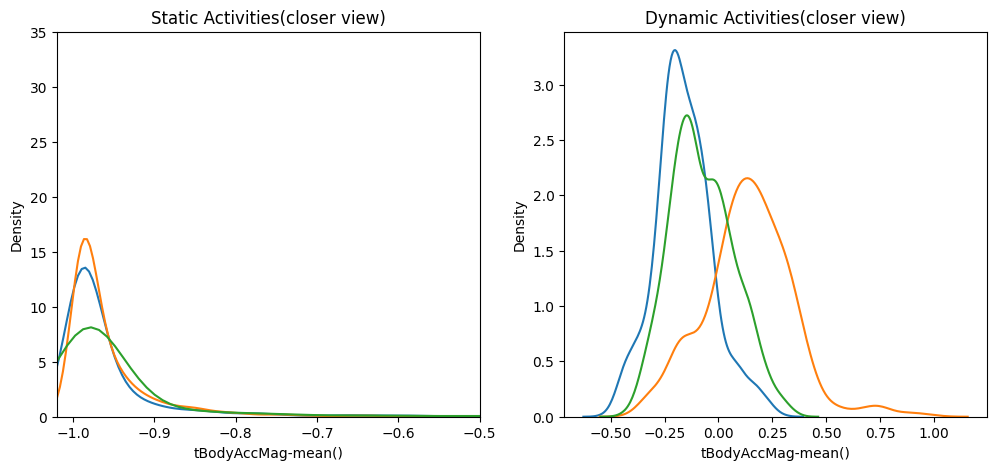

In [16]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Static Activities(closer view)')
sns.distplot(train[train['Activity']=='SITTING']['tBodyAccMag-mean()'],hist = False , label = 'Sitting')
sns.distplot(train[train['Activity']=='STANDING']['tBodyAccMag-mean()'],hist = False , label = 'Standing')
sns.distplot(train[train['Activity']=='LAYING']['tBodyAccMag-mean()'],hist = False , label = 'Laying')
plt.axis([-1.02,-0.5,0,35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train['Activity']=='WALKING']['tBodyAccMag-mean()'],hist = False , label = 'WALKING')
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist = False , label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist = False , label = 'WALKING_UPSTAIRS')
plt.show

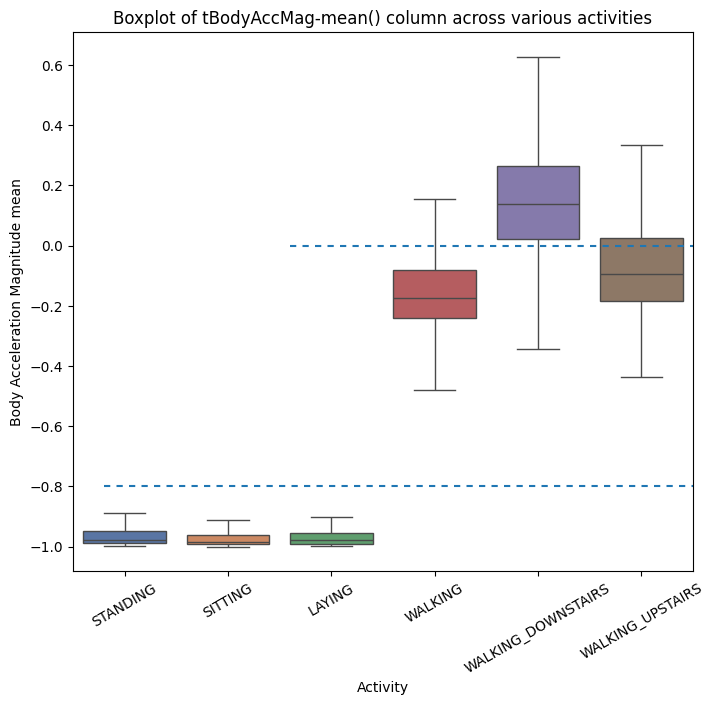

In [17]:
plt.figure(figsize = (8,7))
palette = sns.color_palette("deep", n_colors=train.Activity.nunique())
sns.boxplot(x = "Activity",y = 'tBodyAccMag-mean()',data = train ,showfliers =False ,palette =palette)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMag-mean() column across various activities')
plt.axhline(y = -0.8,xmin = 0.05 , dashes = (3,3))
plt.axhline(y = -0.0,xmin = 0.35 , dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

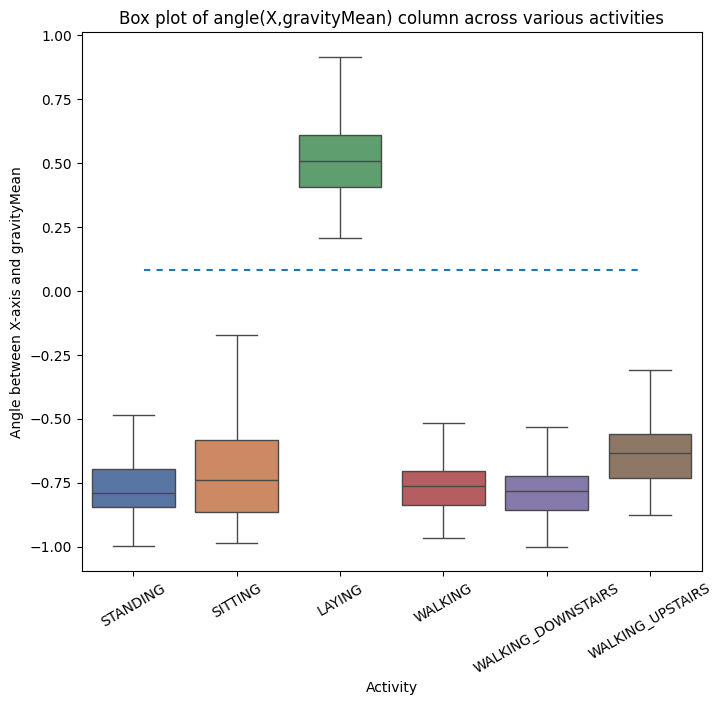

In [18]:
plt.figure(figsize = (8,7))
palette = sns.color_palette("deep", n_colors=train.Activity.nunique())
sns.boxplot(x = 'Activity',y = 'angle(X,gravityMean)',data = train,showfliers = False , palette =palette)
plt.ylabel('Angle between X-axis and gravityMean')
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.axhline(y= 0.08,xmin = 0.1,xmax = 0.9,dashes=(3,3))
plt.show()

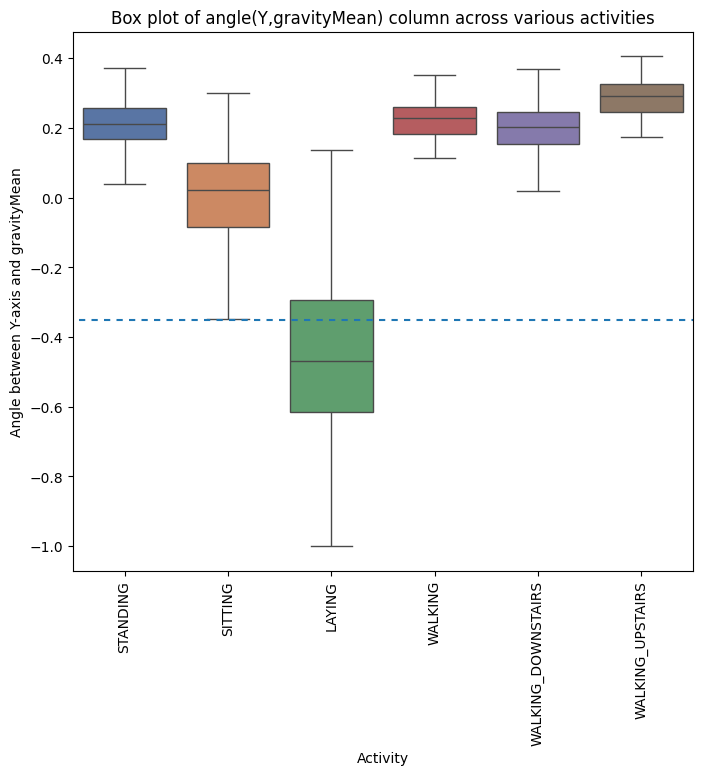

In [19]:
plt.figure(figsize = (8,7))
palette = sns.color_palette("deep", n_colors=train.Activity.nunique())
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data=train,showfliers = False , palette =palette)
plt.ylabel('Angle between Y-axis and gravityMean')
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35,xmin = 0.01,dashes=(3,3))
plt.show()

## Visualizing Data using PCA and TSNE

In [20]:
x_for_pca = train.drop(['subject','Activity'],axis=1)
pca = PCA(n_components=2,random_state = 0).fit_transform(x_for_pca)
pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

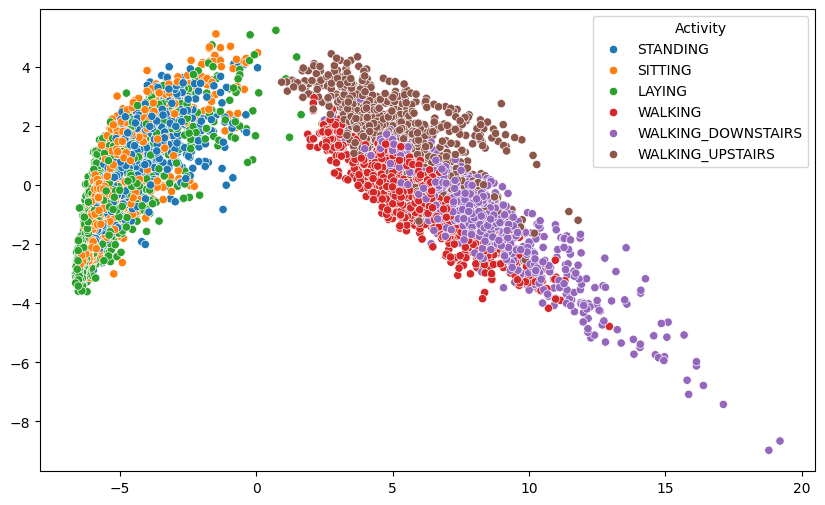

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = pca[:,0],y=pca[:,1],hue =train['Activity'])
plt.show()

In [23]:
x_for_tsne = train.drop(['subject','Activity'],axis=1)
tsne = TSNE(n_components=2,random_state = 0,n_iter = 1000).fit_transform(x_for_tsne)
tsne

array([[ -6.357672,  62.704525],
       [-25.428144,  17.03193 ],
       [-27.190758,  20.238298],
       ...,
       [ 22.866102,  59.438   ],
       [ 22.850883,  59.17455 ],
       [ 23.356674,  58.425007]], dtype=float32)

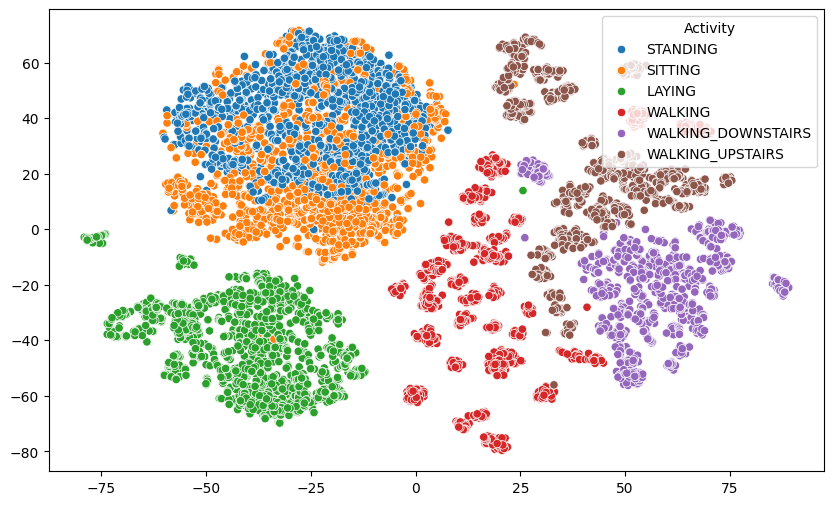

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = tsne[:,0],y=tsne[:,1],hue =train['Activity'])
plt.show()

## Machine Learning Models

In [25]:
X_train = train.drop(['subject','Activity'],axis=1)
Y_train = train.Activity
X_test = test.drop(['subject','Activity'],axis=1)
Y_test = test.Activity
print('Traning Data Set : ',X_train.shape)
print('Test Data Set : ',X_test.shape)

Traning Data Set :  (7352, 561)
Test Data Set :  (2947, 561)


In [26]:
parameter = {'max_iter':[100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions = parameter, cv =5,random_state = 42)
lr_classifier_rs.fit(X_train,Y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [27]:
lr_accuracy = accuracy_score(y_true=Y_test,y_pred=y_pred_lr)
print('Accuracy using Logistic Regression : ',lr_accuracy)

Accuracy using Logistic Regression :  0.9613165931455717


In [28]:
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True label',
           xlabel='Predicted label')
    plt.xticks(rotation=90)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()

In [29]:
cm = confusion_matrix(Y_test.values,y_pred_lr)
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 432,  56,   0,   0,   3],
       [  0,  11, 521,   0,   0,   0],
       [  0,   0,   0, 493,   3,   0],
       [  0,   0,   0,   3, 405,  12],
       [  0,   0,   0,  25,   1, 445]])

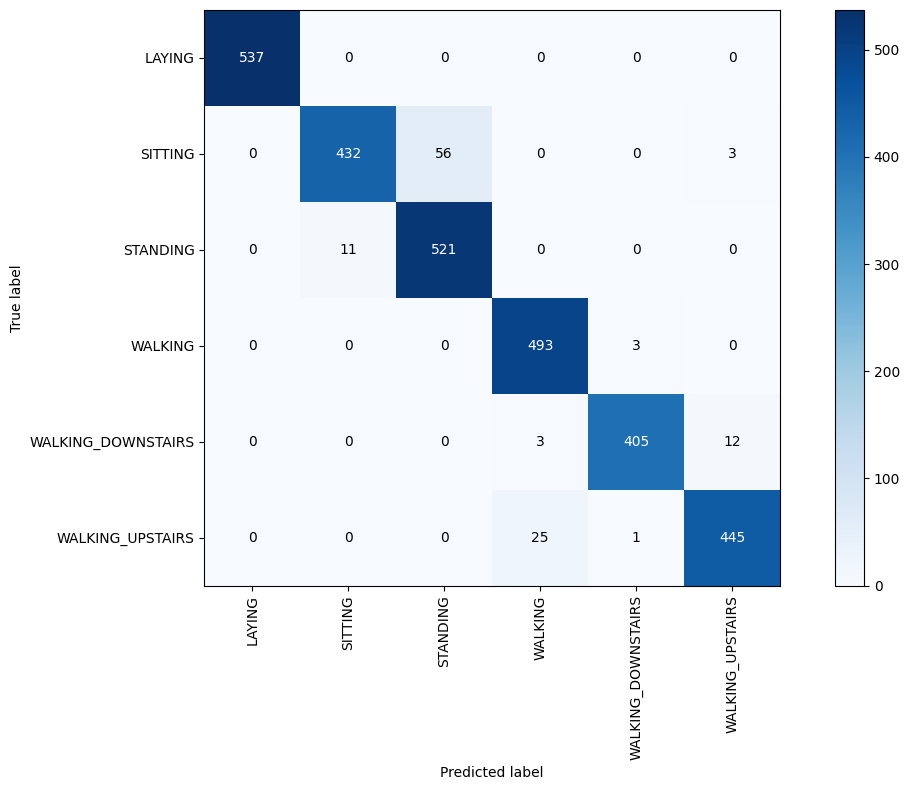

In [30]:
cm = confusion_matrix(Y_test.values, y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [31]:
parameters ={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,50]
}
svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=42)
svm_rs.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [32]:
y_pred = svm_rs.predict(X_test)

In [33]:
kernel_svm_accuracy=accuracy_score(y_true=Y_test,y_pred=y_pred)
print('Accuracy usingm Kernel SVM : ',kernel_svm_accuracy)

Accuracy usingm Kernel SVM :  0.9650492025788938


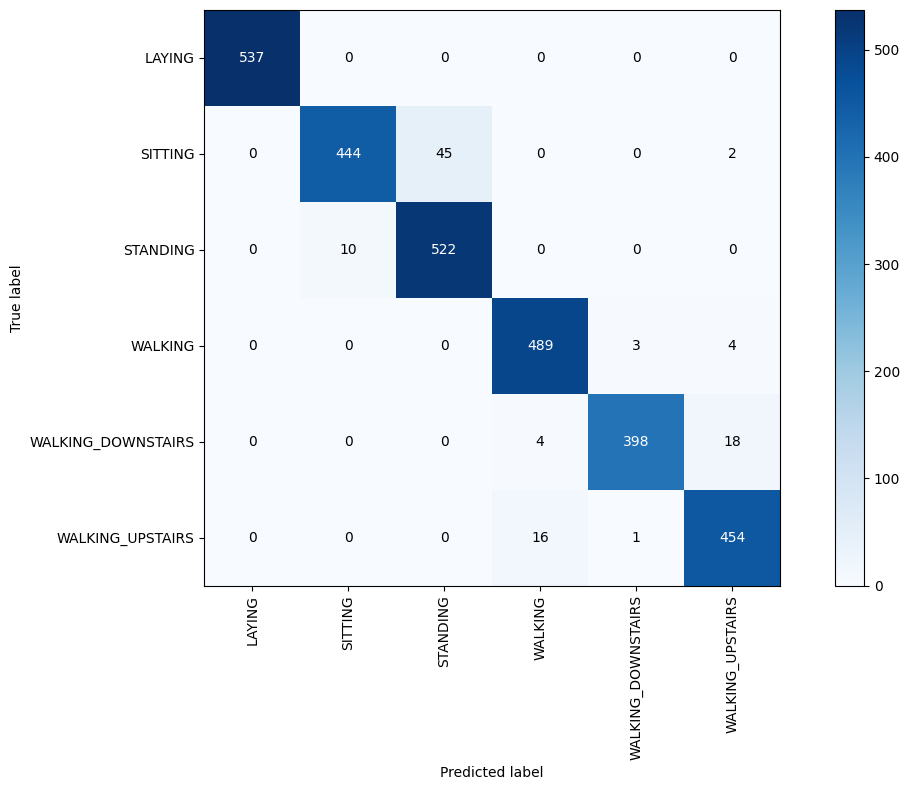

In [34]:
cm = confusion_matrix(Y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [35]:
parameters={'max_depth': np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions = parameters,random_state=42)
dt_classifier_rs.fit(X_train,Y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [36]:
y_pred = dt_classifier_rs.predict(X_test)

In [37]:
dt_accuracy=accuracy_score(y_true=Y_test,y_pred = y_pred)
print('Accuracy usingm Kernel SVM : ',dt_accuracy)

Accuracy usingm Kernel SVM :  0.8737699355276553


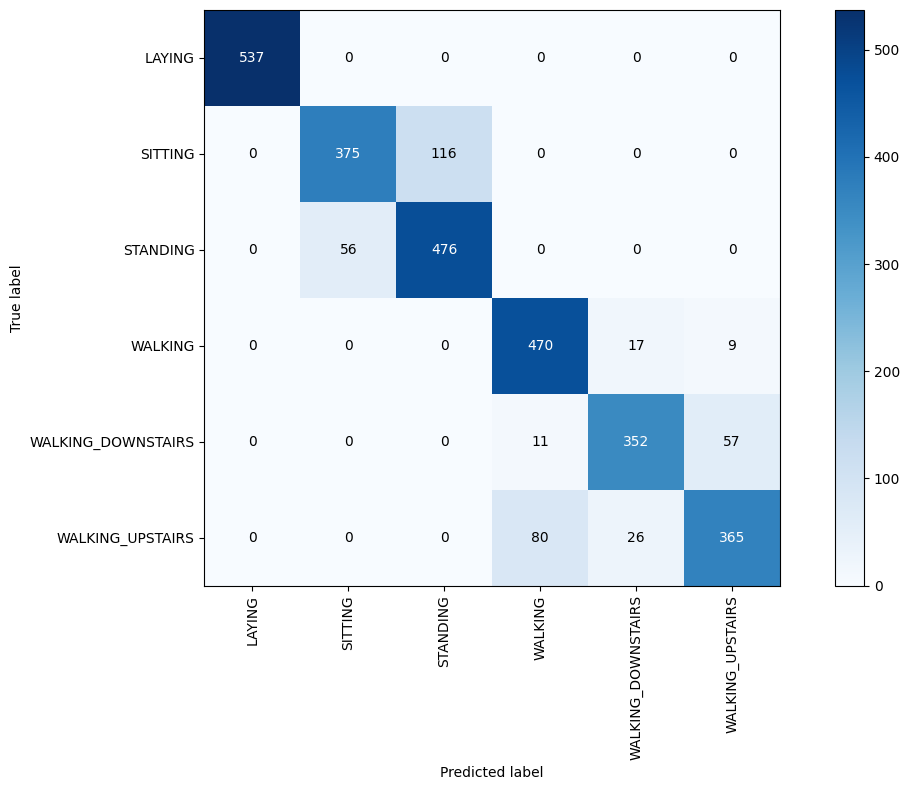

In [38]:
cm = confusion_matrix(Y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [39]:
parameters={
    'n_estimators': np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier,param_distributions = parameters,random_state=42)
rf_classifier_rs.fit(X_train,Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [40]:
y_pred = dt_classifier_rs.predict(X_test)

In [41]:
dt_accuracy=accuracy_score(y_true=Y_test,y_pred = y_pred)
print('Accuracy usingm Kernel SVM : ',dt_accuracy)

Accuracy usingm Kernel SVM :  0.8737699355276553


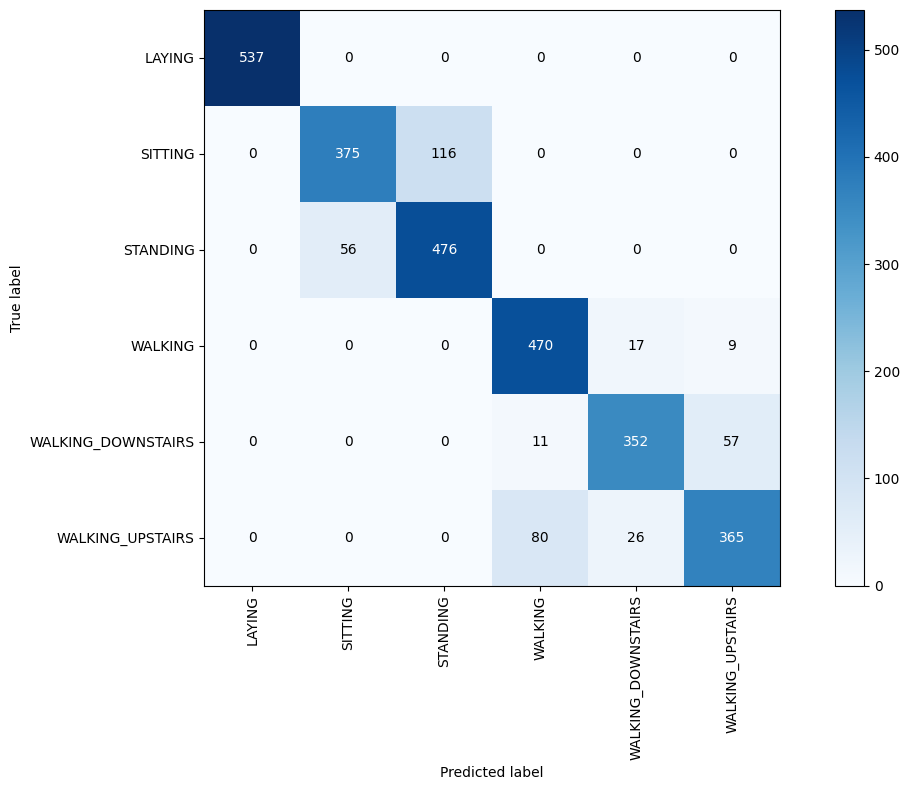

In [42]:
cm = confusion_matrix(Y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

## Cross Validation

In [43]:
parameters = {'max_depth': np.arange(2, 10, 2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions=parameters, random_state=42)
cv_scores = cross_val_score(dt_classifier_rs, X_train, Y_train, cv=5)  # 5-fold cross-validation
dt_classifier_rs.fit(X_train, Y_train)
y_pred = dt_classifier_rs.predict(X_test)
dt_accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print('Accuracy using Decision Tree: ', dt_accuracy)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Accuracy using Decision Tree:  0.8523922633186292
Cross-validation scores:  [0.8096533  0.87423521 0.79795918 0.86802721 0.89183673]
Mean cross-validation score:  0.8483423280937119


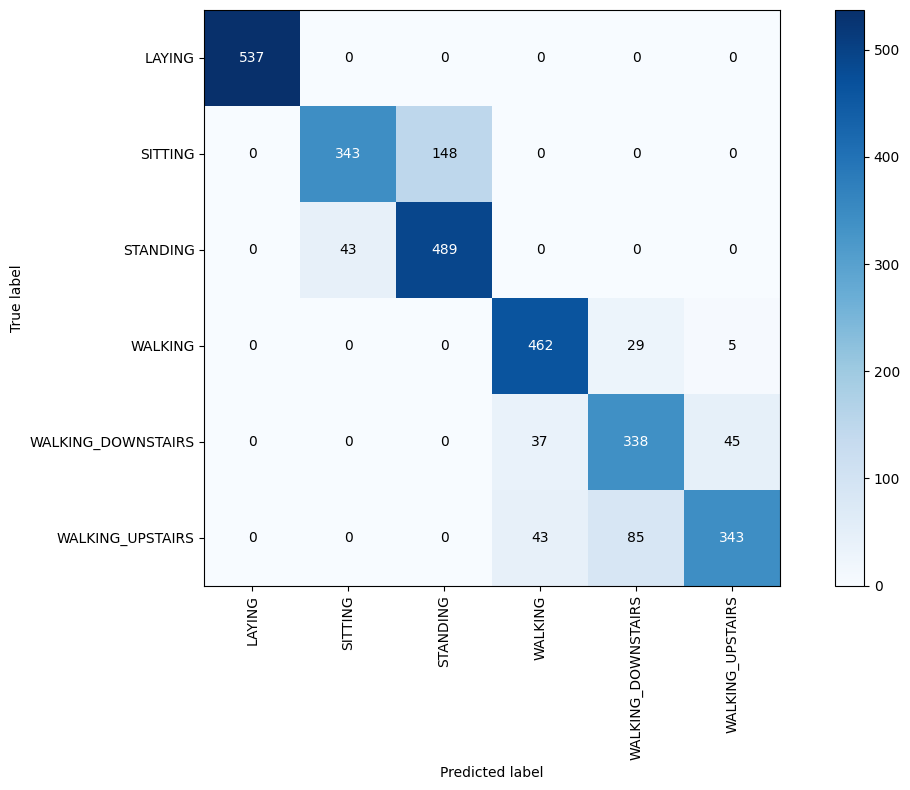

In [44]:
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True label',
           xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()
cm = confusion_matrix(Y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [45]:
parameters = {
    'n_estimators': np.arange(20, 101, 10),
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters, random_state=42, cv=5)
cv_scores = cross_val_score(rf_classifier_rs, X_train, Y_train, cv=5)  # 5-fold cross-validation
rf_classifier_rs.fit(X_train, Y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [46]:
dt_accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print('Accuracy using RandomForestClassifier: ', dt_accuracy)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Accuracy using RandomForestClassifier:  0.9297590770274856
Cross-validation scores:  [0.9157036  0.90074779 0.91088435 0.9122449  0.93877551]
Mean cross-validation score:  0.9156712311029102


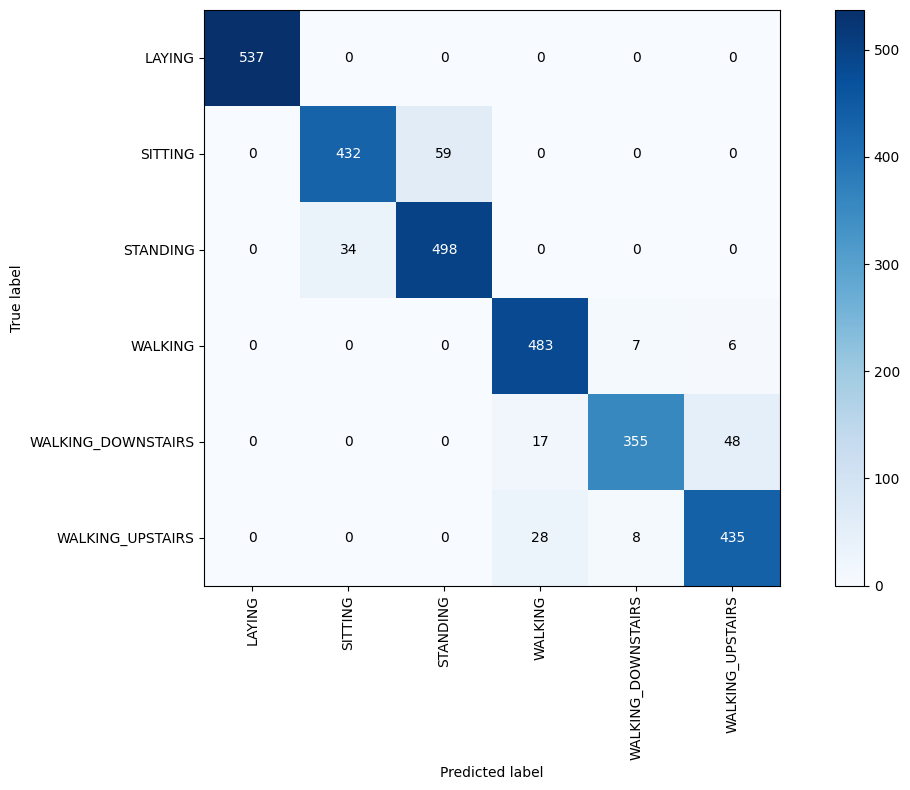

In [47]:
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True label',
           xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()
cm = confusion_matrix(Y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))